In [1]:
import folium
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from folium import plugins

%matplotlib inline

In [2]:
df_london = pd.read_csv('london_crime_by_lsoa.csv')

# Exploration data

In [3]:
df_london.rename(columns={'borough': 'district'}, inplace=True)
df_london

,lsoa_code,district,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [4]:
condition = df_london['value'] >= 1
print(condition)

0           False
1           False
2           False
3           False
4           False
            ...  
13490599    False
13490600     True
13490601    False
13490602    False
13490603    False
Name: value, Length: 13490604, dtype: bool


In [5]:
df_london = df_london[condition]
df_london

,lsoa_code,district,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...,...
13490581,E01000789,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [6]:
df_london.groupby("district", sort=True)["value"].sum().sort_values(ascending=True)

district
City of London               780
Kingston upon Thames       89306
Richmond upon Thames       96771
Sutton                    100987
Bexley                    114136
Merton                    115654
Harrow                    116848
Havering                  138947
Barking and Dagenham      149447
Kensington and Chelsea    171981
Greenwich                 181568
Redbridge                 183562
Bromley                   184349
Hammersmith and Fulham    185259
Hounslow                  186772
Enfield                   193880
Waltham Forest            203879
Wandsworth                204741
Hillingdon                209680
Barnet                    212191
Haringey                  213272
Lewisham                  215137
Hackney                   217119
Brent                     227551
Tower Hamlets             228613
Islington                 230286
Ealing                    251562
Croydon                   260294
Newham                    262024
Camden                    275147
S

## Scatter Plot

Berapa banyak kejadian kriminal yang diterima polisi london dari tahun 2008 - 2016??

In [8]:
df_crime_report = df_london.groupby("year", sort=True)["value"].sum()
df_crime_report = pd.DataFrame(df_crime_report).reset_index()
df_crime_report

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


Text(0, 0.5, 'Jumlah Laporan')

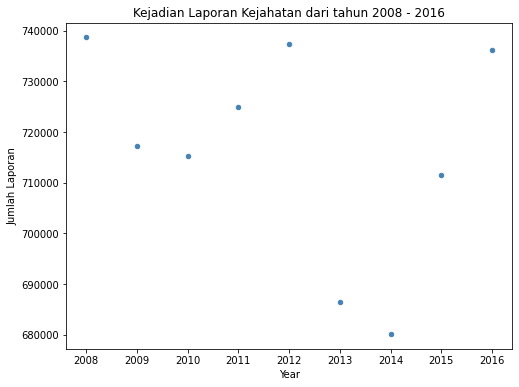

In [9]:
df_crime_report.plot.scatter(figsize=(8, 6), x='year', y='value', color='steelblue')

plt.title('Kejadian Laporan Kejahatan dari tahun 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Jumlah Laporan')

## Box Chart

Penjabaran dari data kejadian kriminal yang diterima polisi london dari tahun 2008 - 2016

In [10]:
df_crime_reports = df_london.groupby("year", sort=True)["value"].sum()
df_crime_reports

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

In [11]:
df_crime_report.describe()

,year,value
count,9.000000,9.000000
mean,2012.000000,716417.555556
std,2.738613,21301.370555
min,2008.000000,680183.000000
25%,2010.000000,711624.000000
50%,2012.000000,717214.000000
75%,2014.000000,736121.000000
max,2016.000000,738641.000000


Text(0, 0.5, 'Jumlah Laporan')

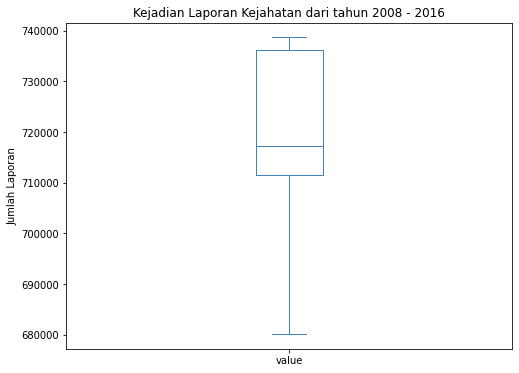

In [12]:
df_crime_reports.plot.box(figsize=(8, 6), color='steelblue')

plt.title('Kejadian Laporan Kejahatan dari tahun 2008 - 2016')
plt.ylabel('Jumlah Laporan')

## Folium Maps 

Peta lokasi kejadian Kriminal Terbanyak (>1) di London

In [23]:
map_crimes = df_london.copy()
map_crimes

,lsoa_code,district,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...,...
13490581,E01000789,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [24]:
map_crimes = map_crimes.groupby("district")["value"].sum().sort_values(ascending=False)

In [25]:
map_crimes = pd.DataFrame(map_crimes).reset_index()

In [26]:
top5CrimesMap = map_crimes.head()
top5CrimesMap

,district,value
0,Westminster,455028
1,Lambeth,292178
2,Southwark,278809
3,Camden,275147
4,Newham,262024


In [27]:
# Longitude
top5CrimesMap.insert(2, 'X', ['-0.135278', '-0.123068', '-0.0833', '-0.140556', '0.035216'])

In [28]:
top5CrimesMap.head()

,district,value,X
0,Westminster,455028,-0.135278
1,Lambeth,292178,-0.123068
2,Southwark,278809,-0.0833
3,Camden,275147,-0.140556
4,Newham,262024,0.035216


In [29]:
# Latitude
top5CrimesMap.insert(3, 'Y', ['51.494720', '51.457148', '51.4500', '51.536388', '51.525516'])

In [30]:
top5CrimesMap.head()

,district,value,X,Y
0,Westminster,455028,-0.135278,51.494720
1,Lambeth,292178,-0.123068,51.457148
2,Southwark,278809,-0.0833,51.4500
3,Camden,275147,-0.140556,51.536388
4,Newham,262024,0.035216,51.525516


In [35]:
# create map and display it
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=12)

# Instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(london_map)

# Loop through the 100 crimes and add each to the map
for lat, lng, label in zip(top5CrimesMap.Y, top5CrimesMap.X, top5CrimesMap.district):
        folium.Marker(
            location = [lat, lng],
            icon=None,
            popup = label
    ).add_to(incidents)
    
    
# Display the map
london_map.add_child(incidents)

## Area Plot

Top Distrik yang paling banyak memiliki kejadian kejahatan diLondon??

In [36]:
topCrimes = df_london.copy()
topCrimes = topCrimes.drop(['lsoa_code'], axis=1)
topCrimes.head()

,district,major_category,minor_category,value,year,month
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,Hackney,Violence Against the Person,Harassment,1,2013,2
32,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


In [37]:
topCrimes= df_london.groupby(["district"])["value"].sum().sort_values(ascending=False)

Text(3, 295000, 'Naik hampir 2 kali lipat')

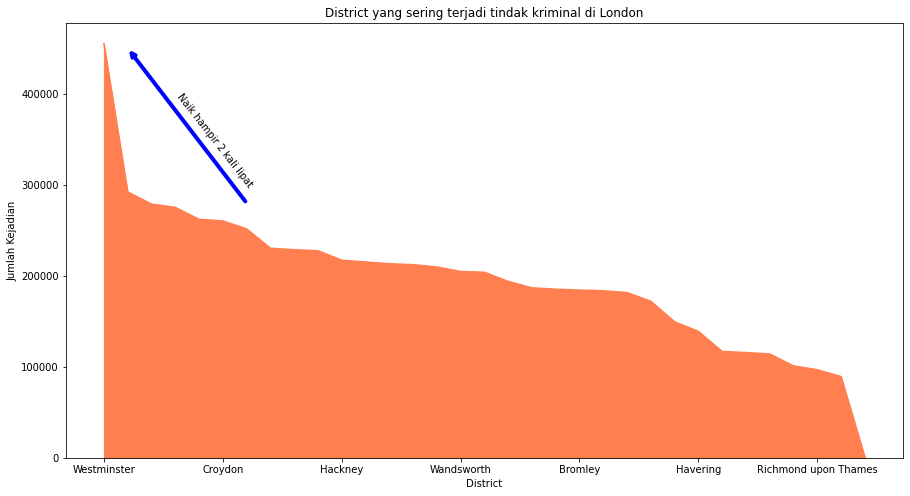

In [38]:
topCrimes.plot.area(figsize=(15, 8), color='coral')

plt.title('District yang sering terjadi tindak kriminal di London')
plt.xlabel('District')
plt.ylabel('Jumlah Kejadian')

plt.annotate('',                     
             xy=(1, 450000),         
             xytext=(6,280000),      
             xycoords='data',        
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=4))


plt.annotate('Naik hampir 2 kali lipat',  
             xy=(3, 295000),              
             rotation=-52,                
             va='bottom',                 
             ha='left')                   


## Word Clouds

Kejahatan yang sering terjadi (>1)

In [39]:
word_cloud = df_london.copy()
word_cloud = word_cloud.drop(['lsoa_code', 'district' ,'value', 'year', 'month'], axis=1)
word_cloud

,major_category,minor_category
9,Theft and Handling,Theft/Taking of Pedal Cycle
16,Theft and Handling,Other Theft Person
24,Theft and Handling,Other Theft Person
25,Violence Against the Person,Harassment
32,Criminal Damage,Criminal Damage To Motor Vehicle
...,...,...
13490581,Violence Against the Person,Harassment
13490584,Violence Against the Person,Assault with Injury
13490590,Theft and Handling,Theft/Taking Of Motor Vehicle
13490592,Violence Against the Person,Common Assault


In [40]:
minor = " ".join(i for i in word_cloud.minor_category)
stopwords = set(STOPWORDS)
wordCloud = WordCloud(stopwords=stopwords, background_color="white").generate(minor)

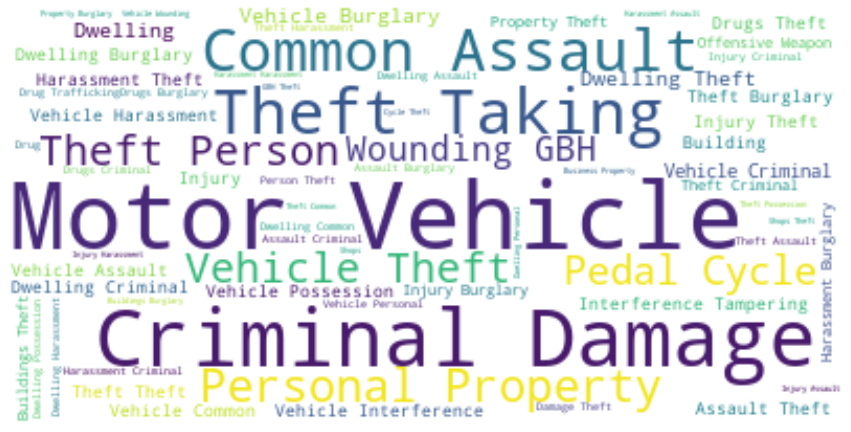

In [41]:
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Histogram 

Kejahatan dalam kategori utama apa saja yang sering dilaporkan oleh penduduk london?? 

Text(0, 0.5, 'Jumlah Laporan')

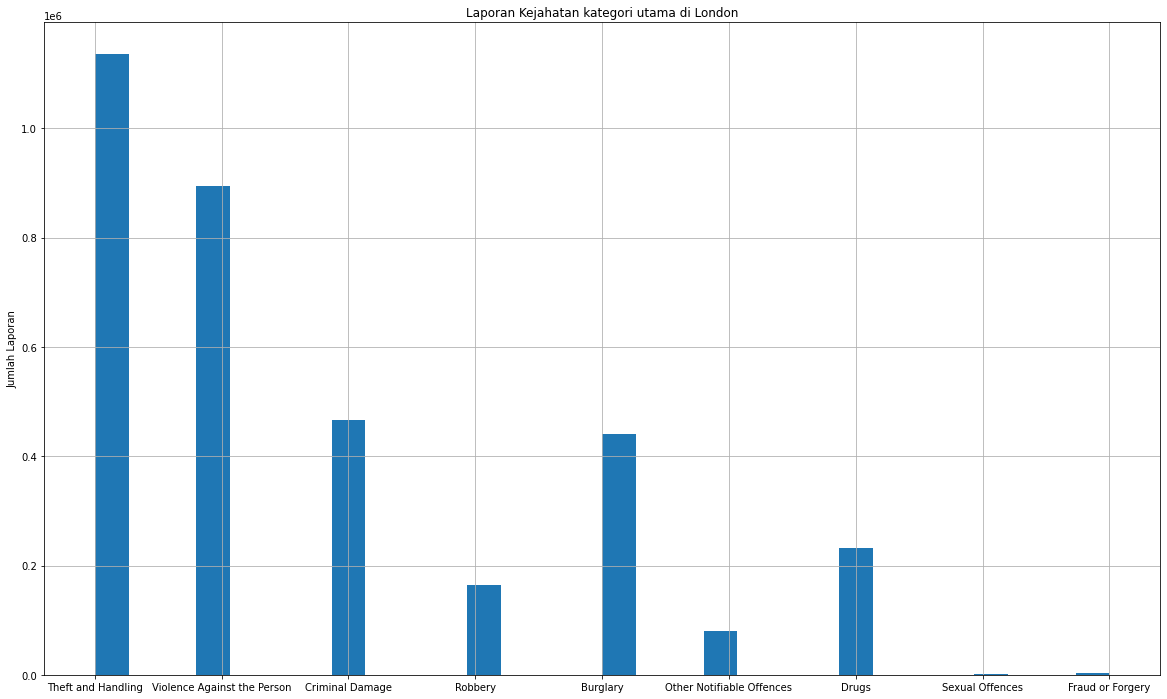

In [42]:
df_london.major_category.hist(bins=30, figsize=(20, 12))

plt.title('Laporan Kejahatan kategori utama di London')
plt.ylabel('Jumlah Laporan')

## Bar Chart 

Kejahatan kategori sampingan apa saja yang sering terjadi di London??

In [43]:
df_crime_london = df_london.copy()
df_crime_london = df_crime_london.drop(['lsoa_code', 'major_category', 'value'], axis=1)
df_crime_london = df_crime_london.sort_values(by='year')
df_crime_london

,district,minor_category,year,month
8872457,Enfield,Other Sexual,2008,1
12696847,Richmond upon Thames,Burglary in a Dwelling,2008,10
6545942,Camden,Theft From Motor Vehicle,2008,3
6545943,Wandsworth,Other Theft,2008,7
6545947,Bexley,Theft/Taking of Pedal Cycle,2008,3
...,...,...,...,...
8689663,Southwark,Other Theft,2016,7
4726826,Ealing,Motor Vehicle Interference & Tampering,2016,6
12285585,Greenwich,Burglary in Other Buildings,2016,4
4726274,Croydon,Harassment,2016,5


Text(0.5, 1.0, 'Jumlah Kejahatan paling banyak dilakukan di london')

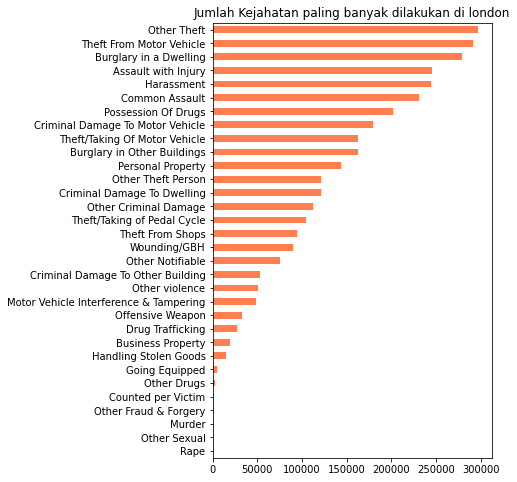

In [44]:
df_crime_london.minor_category.value_counts().sort_values(ascending=True).plot.barh(figsize=(5, 8), color='coral')

plt.title("Jumlah Kejahatan paling banyak dilakukan di london")

## Pie Chart

Kejahatan paling sering (>1) di salah satu wilayah diLondon pada tahun 2016??

In [45]:
df_westminster = df_london.drop(['month'], axis=1)
df_westminster = df_london[
    (df_london['district'] == 'Westminster') & 
    (df_london['year'] == 2016)]

df_westminster

,lsoa_code,district,major_category,minor_category,value,year,month
227,E01004750,Westminster,Theft and Handling,Theft From Motor Vehicle,6,2016,8
700,E01004659,Westminster,Violence Against the Person,Common Assault,1,2016,2
2286,E01004707,Westminster,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,3
2809,E01004740,Westminster,Criminal Damage,Other Criminal Damage,1,2016,9
4153,E01004689,Westminster,Theft and Handling,Handling Stolen Goods,2,2016,12
...,...,...,...,...,...,...,...
13489439,E01004762,Westminster,Criminal Damage,Criminal Damage To Dwelling,1,2016,1
13489534,E01004762,Westminster,Burglary,Burglary in a Dwelling,1,2016,12
13489631,E01033607,Westminster,Theft and Handling,Theft From Motor Vehicle,2,2016,11
13489719,E01033594,Westminster,Theft and Handling,Theft/Taking Of Motor Vehicle,2,2016,12


In [46]:
df_westminster_total_crime = df_westminster.groupby('major_category',)['value'].sum()
df_westminster_total_crime

major_category
Burglary                        3218
Criminal Damage                 2179
Drugs                           2049
Other Notifiable Offences        708
Robbery                         1822
Theft and Handling             27520
Violence Against the Person    10834
Name: value, dtype: int64

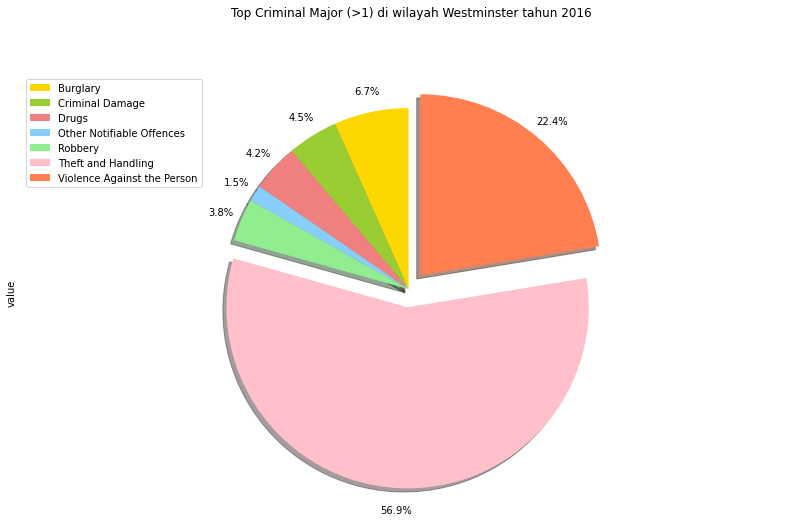

In [47]:
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'coral']

explode_list = [0, 0, 0, 0, 0, 0.1, 0.1]

df_westminster_total_crime.plot(
                                kind = 'pie',
                                figsize = (14, 8),
                                autopct = '%1.1f%%',
                                startangle = 90,
                                shadow = True,
                                labels = None,
                                colors = color_list,
                                pctdistance = 1.12,      
                                explode = explode_list
                            )

plt.title('Top Criminal Major (>1) di wilayah Westminster tahun 2016', y=1.12)
plt.axis('equal')

plt.legend(labels=df_westminster_total_crime.index, loc='upper left')

plt.show()

# Conclusion

Setelah melakukan plot dan memvisualisasikan data dari dataset. banyak hal yang dapat kita ketahui mulai dari laporan kejahatan kriminal yang ada di daerah London terbilang cukup tinggi, Sehingga jika ada wisatawan yang ingin bepergian ke daerah London dan sekitar-nya wajib harus berhati hati karena tindak kriminalitas yang cukup tinggi dan bermacam macam tindak kriminal yang dilaporkan. Salah satu yang paling banyak dilaporkan oleh penduduk kota London tentang "Theft and Handling" disusul dengan "Violence againts the Person" dan lain lain-nya.